<a href="https://colab.research.google.com/github/tuxlimr/Celery_Preprocessing/blob/master/CG_YF_FBprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536084 sha256=649878f827ec73bf20cd44a97f22e890903e4166655387faba6654aa48bfcbb6
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


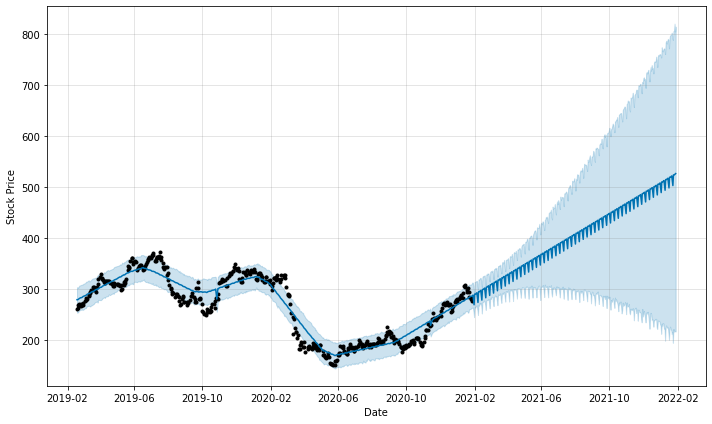

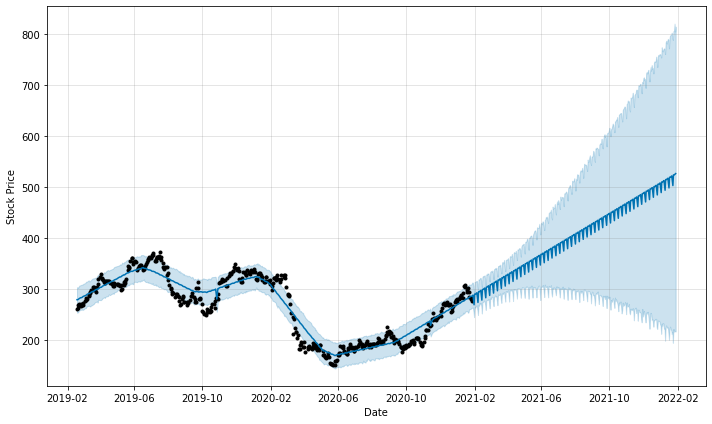

In [5]:


import pandas as pd
from fbprophet import Prophet

# Load data from Yahoo Finance for State Bank of India
df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/SBIN.NS?period1=1550480000&period2=1611827200&interval=1d&events=history')

# Rename the columns to match fbprophet's requirements
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

# Fit the model to the data
m = Prophet()
m.fit(df)

# Create a dataframe to hold future predictions
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

# Plot the prediction
m.plot(forecast, xlabel='Date', ylabel='Stock Price')
